In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
#Data Generation
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

print(len(xs))

print(xs[0])
print(zs[0])

1000
[ 1.56393797]
[-6.89581852]


In [7]:
generated_inputs = np.column_stack((xs,zs))
print(generated_inputs[0])

[ 1.56393797 -6.89581852]


In [22]:
# We add a random small noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))
print(len(noise))

1000


In [23]:
# Produce the targets according to our f(x,z) = 2x - 3z + 5 + noise definition.
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
generated_targets = 2*xs - 3*zs + 5 + noise
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

In [24]:
input_size = 2
output_size = 1

In [25]:
inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.float32, [None, output_size])

print(inputs)
print(targets)

Tensor("Placeholder_8:0", shape=(?, 2), dtype=float32)
Tensor("Placeholder_9:0", shape=(?, 1), dtype=float32)


In [26]:
weights = tf.Variable(tf.random_uniform([input_size, output_size], minval=-0.1, maxval=0.1))
biases = tf.Variable(tf.random_uniform([output_size], minval=-0.1, maxval=0.1))

print(weights)
print(biases)

<tf.Variable 'Variable_2:0' shape=(2, 1) dtype=float32_ref>
<tf.Variable 'Variable_3:0' shape=(1,) dtype=float32_ref>


In [27]:
outputs = tf.matmul(inputs, weights) + biases
print(outputs)

Tensor("add_1:0", shape=(?, 1), dtype=float32)


In [28]:
mean_loss = tf.losses.mean_squared_error(labels=targets, predictions=outputs) / 2.
print(mean_loss)

Tensor("truediv_1:0", shape=(), dtype=float32)


In [29]:
optimize = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(mean_loss)
print(optimize)

name: "GradientDescent_1"
op: "NoOp"
input: "^GradientDescent_1/update_Variable_2/ApplyGradientDescent"
input: "^GradientDescent_1/update_Variable_3/ApplyGradientDescent"



In [30]:
sess = tf.InteractiveSession()
initializer = tf.global_variables_initializer()
sess.run(initializer)

In [31]:
training_data = np.load('TF_intro.npz')

In [32]:
for i in range(100):
    _, curr_loss = sess.run([optimize, mean_loss], 
        feed_dict={inputs: training_data['inputs'], targets: training_data['targets']})
    
    print(curr_loss)

227.705
87.6977
37.6497
19.2415
12.0868
9.00325
7.43611
6.46488
5.75184
5.16944
4.66698
4.22238
3.82459
3.46694
3.1447
2.85409
2.59189
2.35529
2.14177
1.94907
1.77515
1.61819
1.47653
1.34868
1.2333
1.12916
1.03517
0.950342
0.873784
0.804689
0.742329
0.686049
0.635254
0.589411
0.548037
0.510695
0.476994
0.446578
0.419127
0.394352
0.371991
0.35181
0.333597
0.317159
0.302323
0.288934
0.27685
0.265943
0.2561
0.247217
0.239199
0.231963
0.225432
0.219538
0.214218
0.209417
0.205084
0.201174
0.197644
0.194459
0.191584
0.188989
0.186647
0.184534
0.182627
0.180905
0.179351
0.177949
0.176684
0.175541
0.17451
0.17358
0.172741
0.171983
0.171299
0.170681
0.170124
0.169621
0.169168
0.168758
0.168389
0.168055
0.167754
0.167482
0.167237
0.167016
0.166816
0.166635
0.166473
0.166326
0.166193
0.166074
0.165966
0.165868
0.16578
0.165701
0.165629
0.165565
0.165506
0.165454


In [33]:
out = sess.run([outputs], 
               feed_dict={inputs: training_data['inputs']})

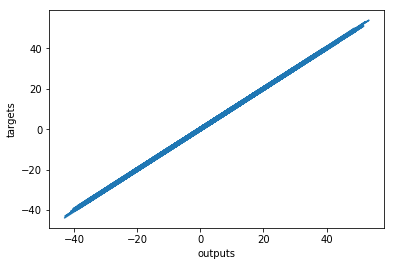

In [34]:
plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()